3-dars


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib as plt
import klib

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

feature transforming 


In [5]:
df=klib.data_cleaning(df)

Shape of cleaned data: (569, 32) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 1
     of which 0 single valued.     Columns: []
Dropped missing values: 569
Reduced memory by at least: 0.07 MB (-50.0%)



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int32   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float32 
 3   texture_mean             569 non-null    float32 
 4   perimeter_mean           569 non-null    float32 
 5   area_mean                569 non-null    float32 
 6   smoothness_mean          569 non-null    float32 
 7   compactness_mean         569 non-null    float32 
 8   concavity_mean           569 non-null    float32 
 9   concave_points_mean      569 non-null    float32 
 10  symmetry_mean            569 non-null    float32 
 11  fractal_dimension_mean   569 non-null    float32 
 12  radius_se                569 non-null    float32 
 13  texture_se               569 non-null    float32 
 14  perimeter_

In [7]:
num_col=df.select_dtypes(exclude=['category']).columns

In [8]:
num_col

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
skewness=df[num_col].skew().sort_values(ascending=False)

In [13]:
print('Skewed columns:\n', skewness)

Skewed columns:
 id                         6.473752
area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave_points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave_points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
texture_wor

In [15]:
import matplotlib as plt

In [30]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

KeyError: 'area_se'

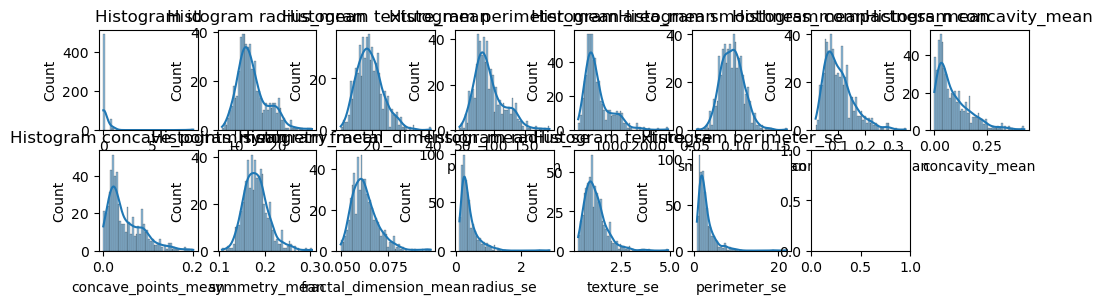

In [48]:
plt.figure(figsize=(12,6))
for i ,col in enumerate(num_col,1):
    plt.subplot(4,8,i)
    sns.histplot(df[col],kde=True, bins=50)
    plt.title(f"Histogram {col}")
plt.tight_layout()
plt.show()

In [36]:
skewed_features=skewness[abs(skewness)>0.5].index.to_list()
print('skewed ustunlar:', skewed_features)

skewed ustunlar: ['id', 'area_se', 'concavity_se', 'fractal_dimension_se', 'perimeter_se', 'radius_se', 'smoothness_se', 'symmetry_se', 'compactness_se', 'area_worst', 'fractal_dimension_worst', 'texture_se', 'area_mean', 'compactness_worst', 'concave_points_se', 'symmetry_worst', 'concavity_mean', 'fractal_dimension_mean', 'compactness_mean', 'concave_points_mean', 'concavity_worst', 'perimeter_worst', 'radius_worst', 'perimeter_mean', 'radius_mean', 'symmetry_mean', 'texture_mean']


In [37]:
df['log_area_se']=np.log1p(df['area_se'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int32   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float32 
 3   texture_mean             569 non-null    float32 
 4   perimeter_mean           569 non-null    float32 
 5   area_mean                569 non-null    float32 
 6   smoothness_mean          569 non-null    float32 
 7   compactness_mean         569 non-null    float32 
 8   concavity_mean           569 non-null    float32 
 9   concave_points_mean      569 non-null    float32 
 10  symmetry_mean            569 non-null    float32 
 11  fractal_dimension_mean   569 non-null    float32 
 12  radius_se                569 non-null    float32 
 13  texture_se               569 non-null    float32 
 14  perimeter_

In [39]:
df.drop(columns=['area_se'], inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int32   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float32 
 3   texture_mean             569 non-null    float32 
 4   perimeter_mean           569 non-null    float32 
 5   area_mean                569 non-null    float32 
 6   smoothness_mean          569 non-null    float32 
 7   compactness_mean         569 non-null    float32 
 8   concavity_mean           569 non-null    float32 
 9   concave_points_mean      569 non-null    float32 
 10  symmetry_mean            569 non-null    float32 
 11  fractal_dimension_mean   569 non-null    float32 
 12  radius_se                569 non-null    float32 
 13  texture_se               569 non-null    float32 
 14  perimeter_

In [41]:
skewed_features_negative=skewness[abs(skewness)<-0.5].index.to_list()
print('skewed ustunlar:', skewed_features_negative)

skewed ustunlar: []


In [42]:
#power uchun shunchaki example

In [46]:
df['pow_perimeter_se'] = np.power(df['perimeter_se'], 2) #perimeter_se da string ham borligi uchun df ni qoshib olamiz 


feature engineering 


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
df['diagnosis']=encoder.fit_transform(df['diagnosis'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.drop(columns=['Unnamed: 32'], inplace=True)

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df['example1']=df['area_worst']/df['compactness_worst']

In [12]:
df['example2']=df['smoothness_worst']*df['symmetry_worst']

In [13]:
df['example3']=df['perimeter_worst']+df['concavity_worst']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,example1,example2,example3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3033.353365,0.074628,185.3119
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,10482.315113,0.034045,159.0416
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,4025.912839,0.052172,152.9504
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,655.315710,0.139265,99.5569
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,7682.926829,0.032481,152.6000
